# Import & Load Data

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [78]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [79]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


# EDA

In [80]:
train.columns

Index(['ID', 'gender', 'age', 'height', 'weight', 'cholesterol',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose',
       'bone_density', 'activity', 'smoke_status', 'medical_history',
       'family_medical_history', 'sleep_pattern', 'edu_level', 'mean_working',
       'stress_score'],
      dtype='object')

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

In [82]:
int_cols = train.select_dtypes("int64").columns
float_cols = train.select_dtypes("float64").columns
obj_cols = train.select_dtypes("object").columns.drop("ID")

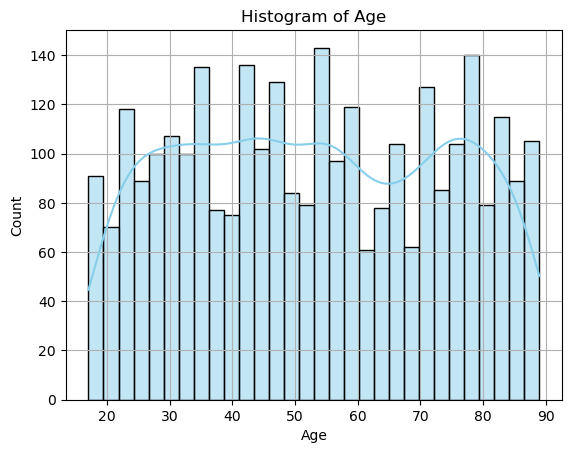

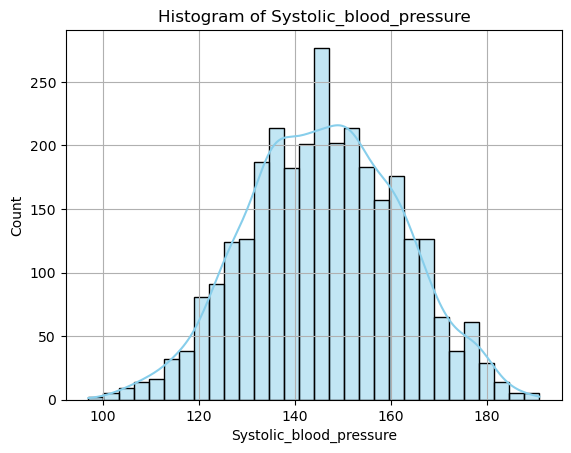

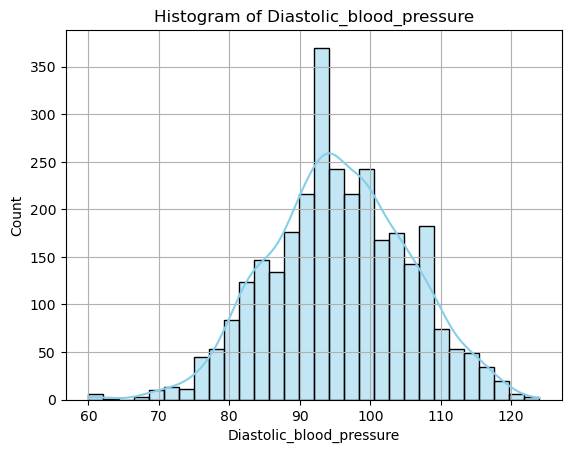

In [83]:
for col in int_cols:
    sns.histplot(data=train, x=col, bins=30, kde=True, color='skyblue')
    title = f'Histogram of {col.capitalize()}'
    plt.title(title)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

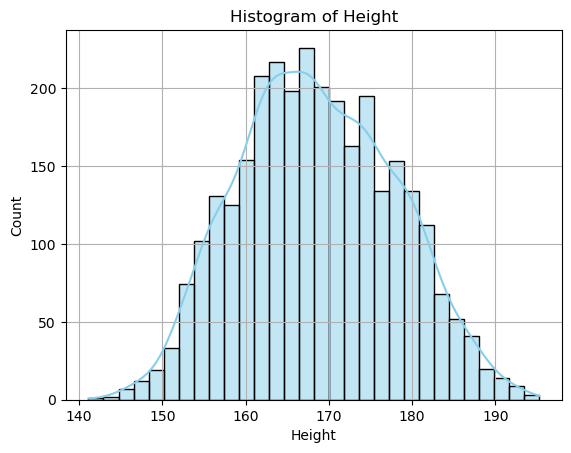

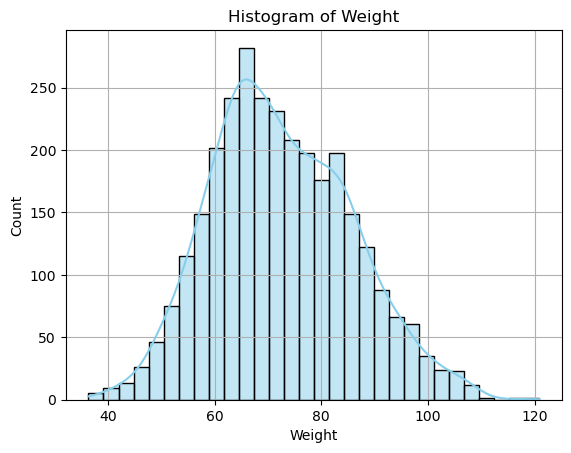

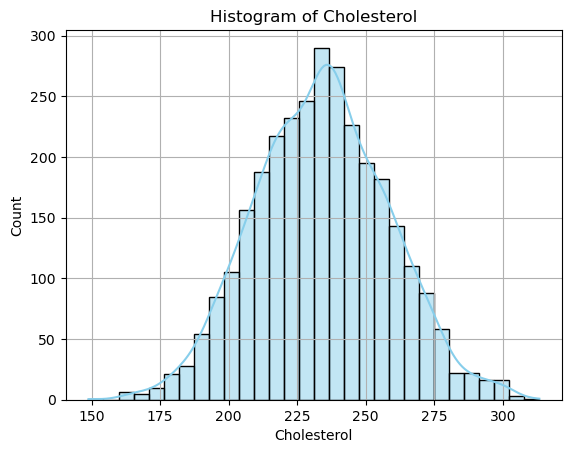

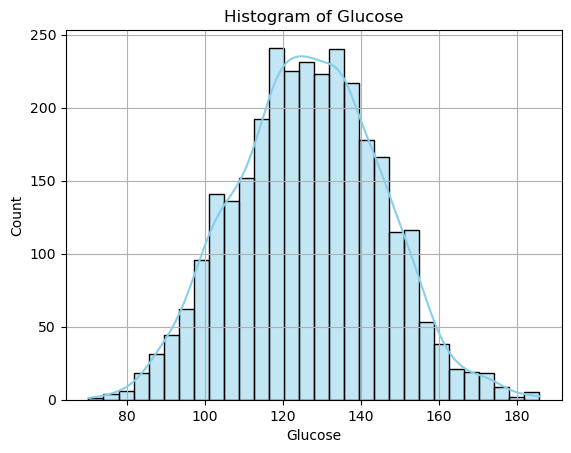

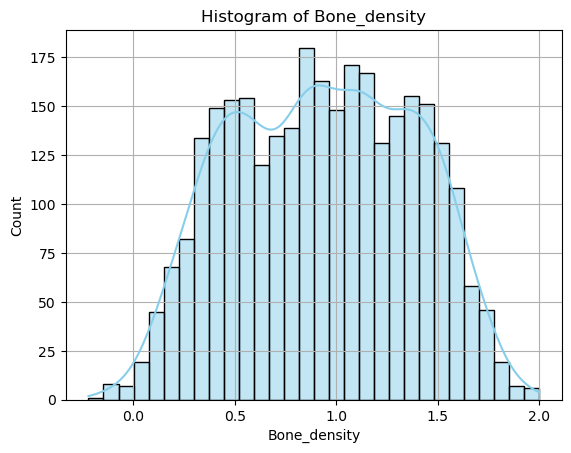

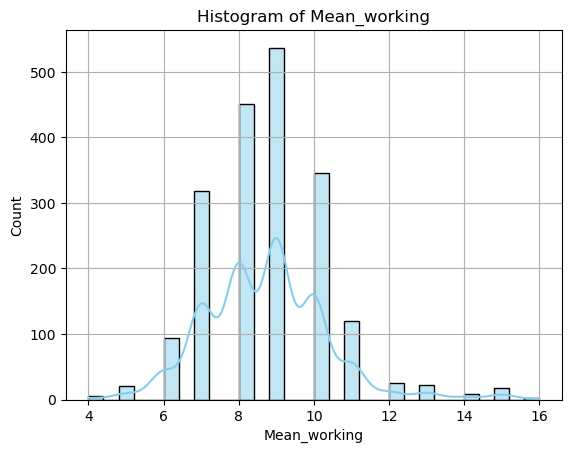

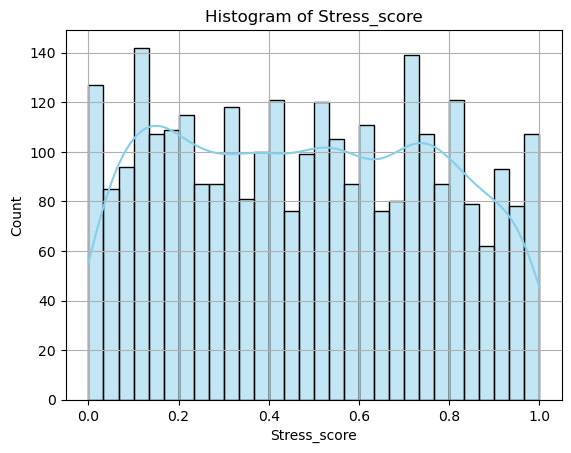

In [84]:
for col in float_cols:
    sns.histplot(data=train, x=col, bins=30, kde=True, color='skyblue')
    title = f'Histogram of {col.capitalize()}'
    plt.title(title)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [85]:
obj_cols

Index(['gender', 'activity', 'smoke_status', 'medical_history',
       'family_medical_history', 'sleep_pattern', 'edu_level'],
      dtype='object')

In [86]:
for col in obj_cols:
    print(train[col].unique())

['F' 'M']
['moderate' 'light' 'intense']
['ex-smoker' 'non-smoker' 'current-smoker']
['high blood pressure' nan 'diabetes' 'heart disease']
['diabetes' nan 'high blood pressure' 'heart disease']
['sleep difficulty' 'normal' 'oversleeping']
['bachelors degree' 'graduate degree' 'high school diploma' nan]


In [87]:
train.isnull().sum()

ID                             0
gender                         0
age                            0
height                         0
weight                         0
cholesterol                    0
systolic_blood_pressure        0
diastolic_blood_pressure       0
glucose                        0
bone_density                   0
activity                       0
smoke_status                   0
medical_history             1289
family_medical_history      1486
sleep_pattern                  0
edu_level                    607
mean_working                1032
stress_score                   0
dtype: int64

<Axes: xlabel='mean_working'>

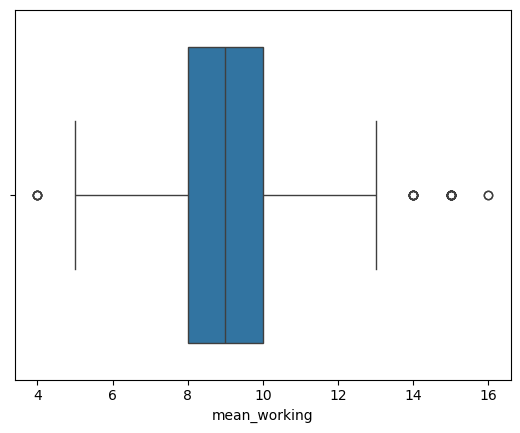

In [88]:
sns.boxplot(data=train, x='mean_working')

# Preprocess

* mean_working은 우선 중앙값(9)로 대체 -> 나중에 0으로 대체하는 것도 시도
* gender, medical_history, family_medical_history : 원핫인코딩 -> 결측치는 다 0
* activity, smoke_status, sleep_pattern, edu_level : 라벨인코딩 -> 결측치는 0
* 나중에 라벨인코딩 컬럼들은 category dtype이 아닌 int dtype으로도 시도

* 정규화도 고려(scaling)

In [89]:
# mean_working (float) 결측치 채우기
mean_working_meidan = train['mean_working'].median()

train['mean_working'] = train['mean_working'].fillna(mean_working_meidan)
test['mean_working'] = train['mean_working'].fillna(mean_working_meidan) # train set의 중앙값으로 test set의 결측치도 채움


In [90]:
# gender, medical_history, family_medical_history One-Hot Encoding

cols_onehot = ['gender', 'medical_history', 'family_medical_history']
cols_onehot_with_na= [col for col in cols_onehot if train[col].isna().any()] # test에만 결측치가 있을 경우 oov로 판단
cols_onehot_without_na = [col for col in cols_onehot if col not in cols_onehot_with_na]

# cols_onehot_without_na = ['gender']
# cols_onehot_with_na = ['medical_history', 'family_medical_history']

train_dummy_list = []

for col in cols_onehot:
    if col in cols_onehot_with_na:
        dummies = pd.get_dummies(train[col], prefix=col, dummy_na=True)
    else:
        dummies = pd.get_dummies(train[col], prefix=col, dummy_na=False)
    train_dummy_list.append(dummies)

train_dummies = pd.concat(train_dummy_list, axis=1)

test_dummy_list = []

for col in cols_onehot:
    if col in cols_onehot_with_na:
        dummies = pd.get_dummies(test[col], prefix=col, dummy_na=True)
    else:
        dummies = pd.get_dummies(test[col], prefix=col, dummy_na=False)
    test_dummy_list.append(dummies)

test_dummies = pd.concat(test_dummy_list, axis=1)

# OOV
missing_cols = set(train_dummies.columns) - set(test_dummies.columns)
for col in missing_cols:
    test_dummies[col] = 0

# 열 정렬
test_dummies = test_dummies[train_dummies.columns]

train = pd.concat([train.drop(columns=cols_onehot), train_dummies], axis=1)
test = pd.concat([test.drop(columns=cols_onehot), test_dummies], axis=1)

In [91]:
cols_ordinal = ['activity', 'smoke_status', 'sleep_pattern', 'edu_level']
for col in cols_ordinal:
    print(train[col].unique())

['moderate' 'light' 'intense']
['ex-smoker' 'non-smoker' 'current-smoker']
['sleep difficulty' 'normal' 'oversleeping']
['bachelors degree' 'graduate degree' 'high school diploma' nan]


In [99]:
# activity, smoke_status, sleep_pattern, edu_level Ordinal Encoding

cols_ordinal = ['activity', 'smoke_status', 'sleep_pattern', 'edu_level']
cols_ordinal_with_na = [col for col in cols_ordinal if train[col].isna().any()]
cols_ordinal_without_na = [col for col in cols_ordinal if col not in cols_ordinal_with_na]

# cols_ordinal_without_na = ['activity', 'smoke_status', 'sleep_pattern']
# cols_ordinal_with_na = ['edu_level']

train[cols_ordinal_with_na] = train[cols_ordinal_with_na].fillna('__nan__')
test[cols_ordinal_with_na] = test[cols_ordinal_with_na].fillna('__nan__')

category_orders = {
    'activity': ['__nan__', 'light', 'moderate', 'intense'],
    'smoking': ['__nan__', 'non-smoker', 'ex-smoker', 'current-smoker'],
    'sleep': ['__nan__', 'sleep difficulty', 'normal', 'oversleeping'],
    'education': ['__nan__', 'high school diploma', 'bachelors degree', 'graduate degree']
}

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train[cols_ordinal] = oe.fit_transform(train[cols_ordinal])
test[cols_ordinal] = oe.transform(test[cols_ordinal])

train[cols_ordinal] = train[cols_ordinal].astype('category')
test[cols_ordinal] = test[cols_ordinal].astype('category')

In [100]:
print(train.columns)

Index(['ID', 'age', 'height', 'weight', 'cholesterol',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose',
       'bone_density', 'activity', 'smoke_status', 'sleep_pattern',
       'edu_level', 'mean_working', 'stress_score', 'gender_F', 'gender_M',
       'medical_history_diabetes', 'medical_history_heart disease',
       'medical_history_high blood pressure', 'medical_history_nan',
       'family_medical_history_diabetes',
       'family_medical_history_heart disease',
       'family_medical_history_high blood pressure',
       'family_medical_history_nan'],
      dtype='object')


# Save

In [101]:
train.to_csv("../data/train_preprocessed.csv", index=False)
test.to_csv("../data/test_preprocessed.csv", index=False)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   ID                                          3000 non-null   object  
 1   age                                         3000 non-null   int64   
 2   height                                      3000 non-null   float64 
 3   weight                                      3000 non-null   float64 
 4   cholesterol                                 3000 non-null   float64 
 5   systolic_blood_pressure                     3000 non-null   int64   
 6   diastolic_blood_pressure                    3000 non-null   int64   
 7   glucose                                     3000 non-null   float64 
 8   bone_density                                3000 non-null   float64 
 9   activity                                    3000 non-null   category
 10  